# Customizing QuickPlot

This notebook shows how to customize PyBaMM's `QuickPlot`, using matplotlib's [style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

First we define and solve the models

In [1]:
%pip install pybamm -q
import pybamm

models = [pybamm.lithium_ion.SPM(), pybamm.lithium_ion.SPMe(), pybamm.lithium_ion.DFN()]
sims = []
for model in models:
    sim = pybamm.Simulation(model)
    sim.solve([0, 3600])
    sims.append(sim)

You should consider upgrading via the '/Users/vsulzer/Documents/Energy_storage/PyBaMM/.tox/dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Call the default plots

In [2]:
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Using style sheets

The easiest way to customize style is to use one of matplotlib's available style sheets

In [3]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'light',
 'muted',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

For example we can use the ggplot style from R. In this case, the title fonts are quite large, so we reduce the number of words in a title before a line break

In [4]:
plt.style.use("ggplot")
pybamm.settings.max_words_in_line = 3
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

To reset to pybamm defaults do

In [5]:
plt.style.use(["default", pybamm.default_plot_style])
pybamm.settings.max_words_in_line = 4
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Another good set of style sheets for scientific plots is available by pip installing the [SciencePlots](https://github.com/garrettj403/SciencePlots) package

## Further customization using rcParams

Sometimes we want further customization of a style, without needing to edit the style sheets. For example, we can update the font sizes and plot again.

To change the line colors, we use `cycler`

In [6]:
import matplotlib as mpl
from cycler import cycler

mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] =  12
mpl.rcParams["ytick.labelsize"] =  12
mpl.rcParams["legend.fontsize"] =  12
mpl.rcParams["axes.prop_cycle"] = cycler('color', ["k", "g", "c"])
pybamm.dynamic_plot(sims);

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Very fine customization

Some customization of the `QuickPlot` object is possible by passing arguments - see the [docs](https://pybamm.readthedocs.io/en/latest/source/plotting/quick_plot.html) for details

We can also further control the plot by calling `plot.fig` after the figure has been created, and editing the matplotlib objects. For example, here we move the titles to the ylabel, and move the legend.

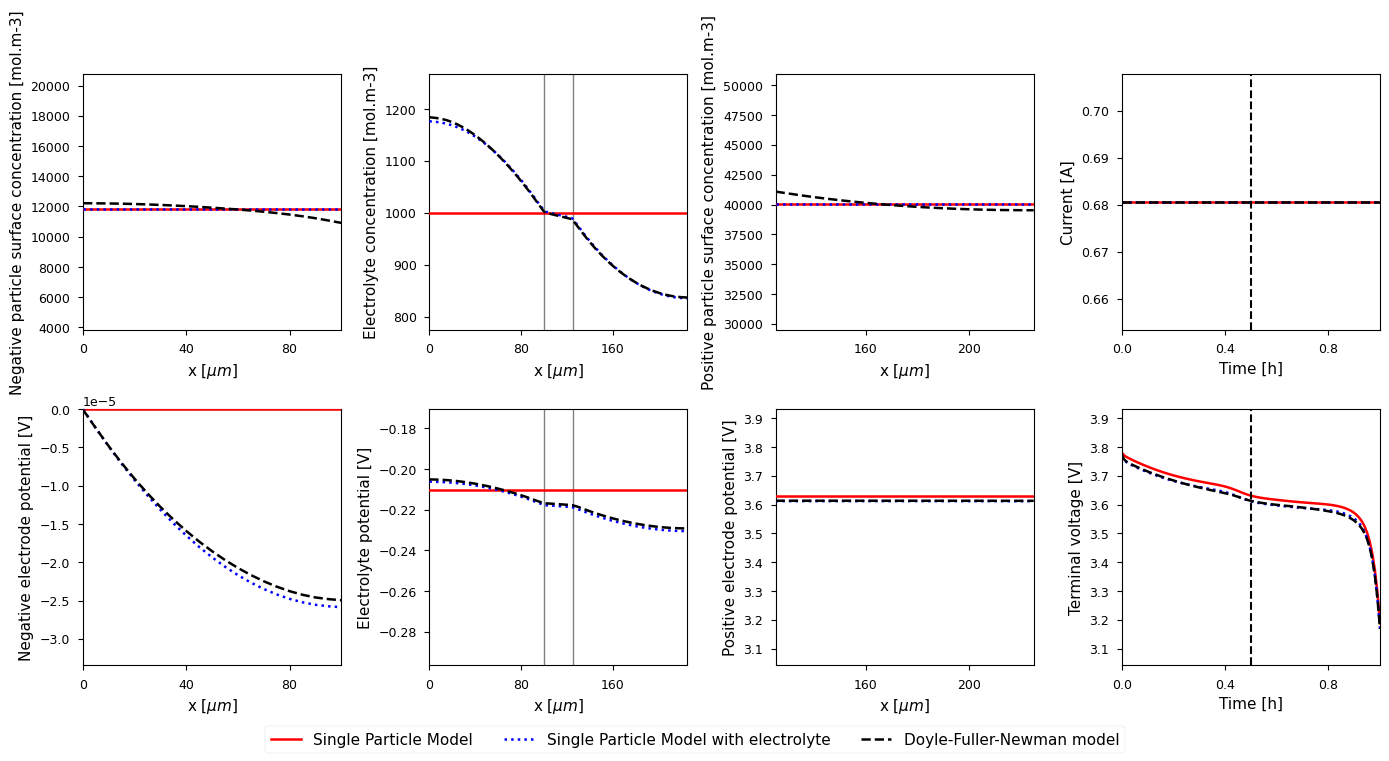

In [7]:
plt.style.use(["default", pybamm.default_plot_style])
pybamm.settings.max_words_in_line = 4

plot = pybamm.QuickPlot(sims, figsize=(14,7))
plot.plot(0.5); # time in hours

# Move title to ylabel
for ax in plot.fig.axes:
    title = ax.get_title()
    ax.set_title("")
    ax.set_ylabel(title)
    
# Remove old legend and add a new one in the bottom
leg = plot.fig.get_children()[-1]
leg.set_visible(False)
plot.fig.legend(plot.labels, loc="lower center", ncol=len(plot.labels), fontsize=11)

# Adjust layout
plot.gridspec.tight_layout(plot.fig, rect=[0, 0.04, 1, 1])

The figure can then be saved using `plot.fig.savefig`

## References

The relevant papers for this notebook are:

In [8]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, and S. Jon Chapman. An asymptotic derivation of a single particle model with electrolyte. Journal of The Electrochemical Society, 166(15):A3693–A3706, 2019. doi:10.1149/